In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

#### DEFINATION OF ADDITIVE TIME SERIES:
Value = Base Level + Trend + Seasonality + Error
- - - 
#### DEFINATION OF MULTIPLICATIVE TIME SERIES:
Value = Base Level x Trend x Seasonality x Error

In [3]:
DrugSalesData = pd.read_csv('AusAntidiabeticDrug.csv', parse_dates = ['Date'], index_col = 'Date')

In [4]:
DrugSalesData.head()

,Value
Date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [5]:
DrugSalesData.isnull().sum()

Value    0
dtype: int64

In [6]:
DrugSalesData.reset_index(inplace = True)

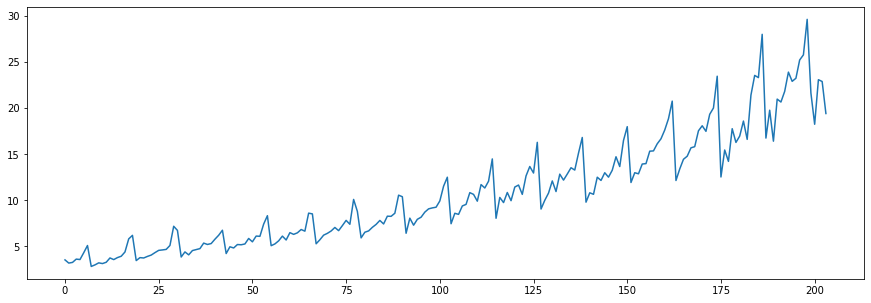

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (15, 5)})
plt.plot(DrugSalesData['Value'])

In [9]:
DrugSalesData.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

#### DECOMPOSITION - Multiplicative & Additive

In [13]:
# Multiplicative
mul_result = seasonal_decompose(DrugSalesData['Value'], model = 'multiplicative', freq = 1)

# Additive Decomposition
add_result = seasonal_decompose(DrugSalesData['Value'], model = 'additive', freq = 1)

Text(0.5, 0.98, 'Multiplicative Decompose')

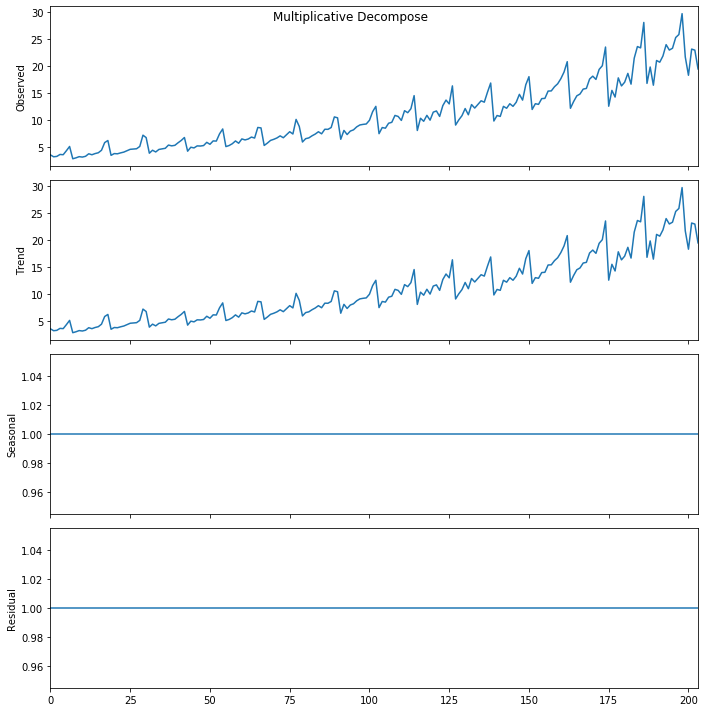

In [16]:
# Plot
plt.rcParams.update({'figure.figsize': (10, 10)})
mul_result.plot().suptitle('Multiplicative Decompose', fontsize = 12)

Text(0.5, 0.98, 'Additive Decompose')

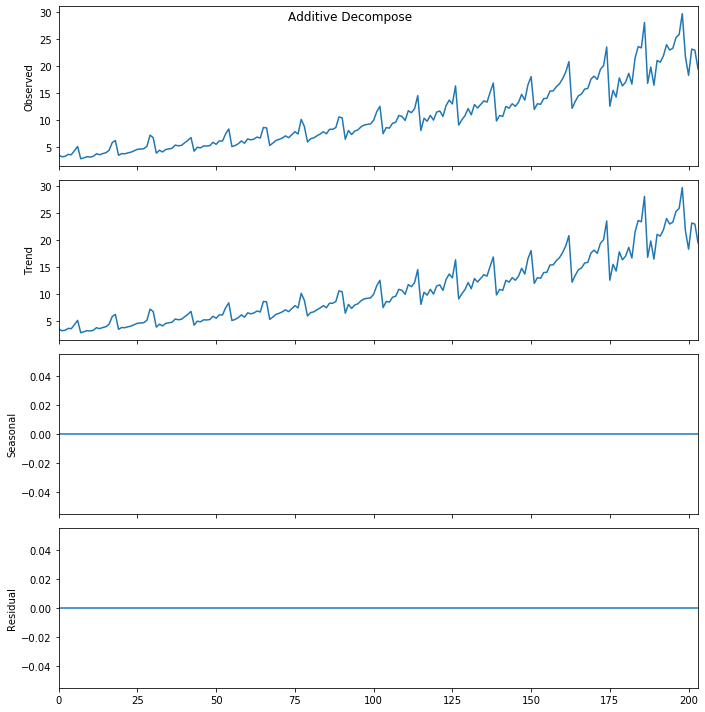

In [17]:
# Plot
plt.rcParams.update({'figure.figsize': (10, 10)})
add_result.plot().suptitle('Additive Decompose', fontsize = 12)

In [18]:
# ADDITIVE
df_Additive = pd.concat([add_result.seasonal, add_result.trend,
                         add_result.resid, add_result.observed], axis = 1)
df_Additive.columns = ['Seasonality', 'Trend', 'Residual', 'Actual_Values']
df_Additive.head(10)

,Seasonality,Trend,Residual,Actual_Values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869
5,0.0,4.306371,0.0,4.306371
6,0.0,5.088335,0.0,5.088335
7,0.0,2.814520,0.0,2.814520
8,0.0,2.985811,0.0,2.985811
9,0.0,3.204780,0.0,3.204780


In [19]:
# MULTIPLICATIVE
df_Multiplicative = pd.concat([mul_result.seasonal, mul_result.trend,
                         mul_result.resid, mul_result.observed], axis = 1)
df_Multiplicative.columns = ['Seasonality', 'Trend', 'Residual', 'Actual_Values']
df_Multiplicative.head(10)

,Seasonality,Trend,Residual,Actual_Values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869
5,1.0,4.306371,1.0,4.306371
6,1.0,5.088335,1.0,5.088335
7,1.0,2.814520,1.0,2.814520
8,1.0,2.985811,1.0,2.985811
9,1.0,3.204780,1.0,3.204780


#### ADFULLER TEST FOR STATIONARY

##### STATIONARITY = CONSTANT MEAN & VARIANCE

##### HYPOTHESES TESTING

If P-Value < 0.05 Reject H0 and P-Value > 0.05 Can't Except H1 

In [20]:
from statsmodels.tsa.stattools import adfuller

In [33]:
ADFuller_result = adfuller(DrugSalesData.Value.values, autolag = 'AIC')

print(f"ADF Statistic:______ {ADFuller_result[0]}")
print(f"P-Value:____________ {ADFuller_result[1]}" + " [must be > 0.05 to reject H0]")
print(f"Number of Lags:_____ {ADFuller_result[2]}")
print(f"Observations:_______ {ADFuller_result[3]}")
for key, value in ADFuller_result[4].items():
    print(F"Critical Value:_____ {key}, {value}")

ADF Statistic:______ 3.1451856893067296
P-Value:____________ 1.0 [must be > 0.05 to reject H0]
Number of Lags:_____ 15
Observations:_______ 188
Critical Value:_____ 1%, -3.465620397124192
Critical Value:_____ 5%, -2.8770397560752436
Critical Value:_____ 10%, -2.5750324547306476
